<a href="https://colab.research.google.com/github/AngeClementAkazan/Deep-Learning/blob/main/Logistic%20regression%20using%20Tensor%20and%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load data
from sklearn.datasets import load_breast_cancer

In [2]:
dta=load_breast_cancer()

In [3]:
dta.keys()
print(type(dta))
# (N,D)= (569, 30) will be useful to our model
dta.data.shape
#check the target
dta.target # One dimensional array
print(dta.target_names) #Check what is one what is zero
dta.feature_names

<class 'sklearn.utils.Bunch'>
['malignant' 'benign']


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(dta.data,
                            dta.target, test_size=0.2)


In [5]:
from sklearn.preprocessing import StandardScaler

scler=StandardScaler()
X_train= scler.fit_transform(X_train) #We fit to get  the mean and standard deviation 
X_test=scler.transform(X_test)

In [6]:
#Creating model
import tensorflow as tf
N,D=X_train.shape
model= tf.keras.models.Sequential( [tf.keras.layers.Input(shape=(D,)), #the model an
                      tf.keras.layers.Dense(1, activation='sigmoid')]
                                 )
#Alternative way to do it
# model= tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(output_size, input_shape=(nb_col,), activation =''))

In [7]:
#Train/fit
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
md_ft= model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=200)

Epoch 1/200
15/15 [==============================] - 1s 12ms/step - loss: 0.8491 - accuracy: 0.4879 - val_loss: 0.8056 - val_accuracy: 0.5351
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.7608 - accuracy: 0.5604 - val_loss: 0.7351 - val_accuracy: 0.6140
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.6242 - val_loss: 0.6732 - val_accuracy: 0.6579
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6224 - accuracy: 0.6659 - val_loss: 0.6204 - val_accuracy: 0.7281
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5677 - accuracy: 0.7077 - val_loss: 0.5741 - val_accuracy: 0.7456
Epoch 6/200
15/15 [==============================] - 0s 4ms/step - loss: 0.5215 - accuracy: 0.7516 - val_loss: 0.5342 - val_accuracy: 0.7807
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.7758 - val_loss: 0.4993 - val_accuracy: 0.7982
Epoch 8/200


In [8]:
#Check the last performances
print("Train score", model.evaluate(X_train, y_train))
print("Test score", model.evaluate(X_test, y_test))

15/15 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.9890
Train score [0.06449823826551437, 0.9890109896659851]
4/4 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.9737
Test score [0.11012676358222961, 0.9736841917037964]


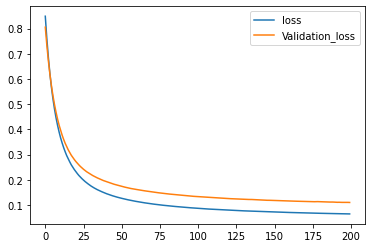

In [11]:
#Plotting loss and validation loss
import matplotlib.pyplot as plt
plt.plot(md_ft.history["loss"], label = "loss")
plt.plot(md_ft.history["val_loss"], label= "Validation_loss")
plt.legend();



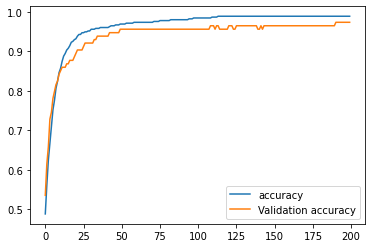

In [12]:
plt.plot(md_ft.history["accuracy"], label = "accuracy")
plt.plot(md_ft.history["val_accuracy"], label= "Validation accuracy")
plt.legend();